## MIMIC DATA PERFORMANCE PLOT

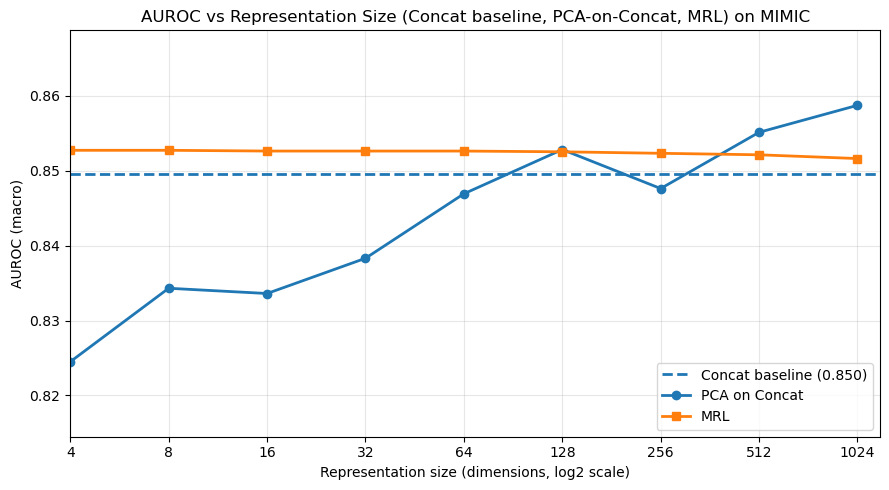

<Figure size 640x480 with 0 Axes>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==== Your inputs ====
concat_baseline_auc = 0.8495

# PCA on Concat (replace with your actual numbers if they changed)
pca_small_auroc = {4: 0.8245, 8: 0.8343}
pca_large_auroc = {
    16: 0.8336, 32: 0.8383, 64: 0.8469,
    128: 0.8528, 256: 0.8476, 512: 0.8551, 1024: 0.8587,
}

# MRL AUROC per representation size (your results)
mrl_auroc = {
    4: 0.8527,
    8: 0.8527,
    16: 0.8526,
    32: 0.8526,
    64: 0.8526,
    128: 0.8525,
    256: 0.8523,
    512: 0.8521,
    1024: 0.8516,
}

# ==== Prep data ====
pca_all = {**pca_small_auroc, **pca_large_auroc}
df_pca  = pd.DataFrame(sorted(pca_all.items()), columns=["dim", "AUROC_macro"])
df_mrl  = pd.DataFrame(sorted(mrl_auroc.items()), columns=["dim", "AUROC_macro"])

# full tick set (log2-spaced)
dims_full = [4, 8, 16, 32, 64, 128, 256, 512, 1024]

# ==== Plot ====
plt.figure(figsize=(9,5))

# Concat baseline
plt.axhline(concat_baseline_auc, linestyle="--", linewidth=2,
            label=f"Concat baseline ({concat_baseline_auc:.3f})")

# PCA on Concat curve
plt.plot(df_pca["dim"], df_pca["AUROC_macro"], marker="o", linewidth=2,
         label="PCA on Concat")

# MRL curve (your per-dim results)
plt.plot(df_mrl["dim"], df_mrl["AUROC_macro"], marker="s", linewidth=2,
         label="MRL")

# Axes / scales
plt.xscale("log", base=2)
plt.xticks(dims_full, labels=dims_full)
plt.xlim(4, 1200)

plt.xlabel("Representation size (dimensions, log2 scale)")
plt.ylabel("AUROC (macro)")
plt.title("AUROC vs Representation Size (Concat baseline, PCA-on-Concat, MRL) on MIMIC" )
plt.grid(True, which="both", alpha=0.3)
# y-limits tuned to your ranges; adjust if needed
ymin = min(df_pca["AUROC_macro"].min(), df_mrl["AUROC_macro"].min(), concat_baseline_auc) - 0.01
ymax = max(df_pca["AUROC_macro"].max(), df_mrl["AUROC_macro"].max(), concat_baseline_auc) + 0.01
plt.ylim(max(0.0, ymin), min(1.0, ymax))

plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

plt.savefig("exports/my_plot.png", dpi=300, bbox_inches="tight")

## EMORY CXR PERFORMANCE PLOT

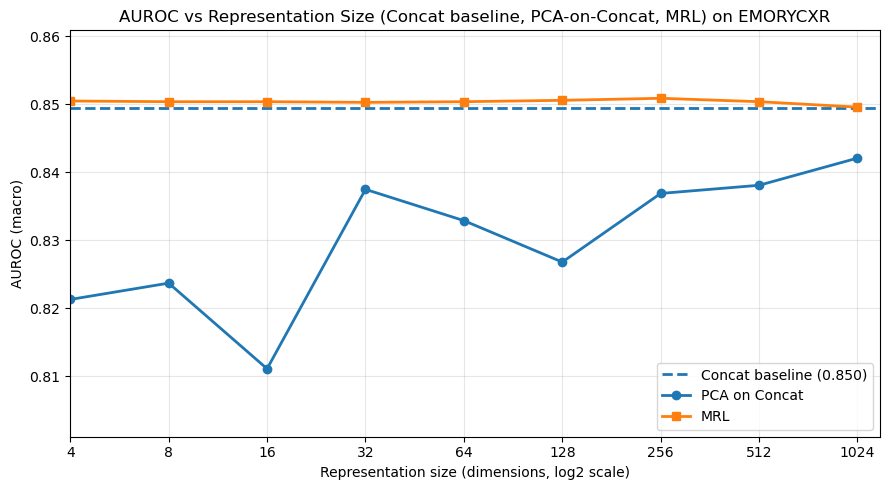

<Figure size 640x480 with 0 Axes>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==== Your inputs ====
concat_baseline_auc = 0.8495

# PCA on Concat (replace with your actual numbers if they changed)
# pca_all = {4: 0.8585, 8: 0.8514, 16: 0.8477, 32: 0.8664, 64: 0.8651, 128: 0.8682, 256: 0.8672 , 512: 0.8660, 1024: 0.8519 }
pca_all2 = {4: 0.8213, 8: 0.8237, 16: 0.8111, 32: 0.8375, 64: 0.8329, 128: 0.8268, 256: 0.8369, 512: 0.8381, 1024: 0.8421  }

# MRL AUROC per representation size (your results)
mrl_auroc = {
    4: 0.8505,
    8: 0.8504,
    16: 0.8504,
    32: 0.8503,
    64: 0.8504,
    128: 0.8506,
    256: 0.8509,
    512: 0.8504,
    1024: 0.8496,
}

# ==== Prep data ====
df_pca  = pd.DataFrame(sorted(pca_all2.items()), columns=["dim", "AUROC_macro"])
df_mrl  = pd.DataFrame(sorted(mrl_auroc.items()), columns=["dim", "AUROC_macro"])

# full tick set (log2-spaced)
dims_full = [4, 8, 16, 32, 64, 128, 256, 512, 1024]

# ==== Plot ====
plt.figure(figsize=(9,5))

# Concat baseline
plt.axhline(concat_baseline_auc, linestyle="--", linewidth=2,
            label=f"Concat baseline ({concat_baseline_auc:.3f})")

# PCA on Concat curve
plt.plot(df_pca["dim"], df_pca["AUROC_macro"], marker="o", linewidth=2,
         label="PCA on Concat")

# MRL curve (your per-dim results)
plt.plot(df_mrl["dim"], df_mrl["AUROC_macro"], marker="s", linewidth=2,
         label="MRL")

# Axes / scales
plt.xscale("log", base=2)
plt.xticks(dims_full, labels=dims_full)
plt.xlim(4, 1200)

plt.xlabel("Representation size (dimensions, log2 scale)")
plt.ylabel("AUROC (macro)")
plt.title("AUROC vs Representation Size (Concat baseline, PCA-on-Concat, MRL) on EMORYCXR" )
plt.grid(True, which="both", alpha=0.3)
# y-limits tuned to your ranges; adjust if needed
ymin = min(df_pca["AUROC_macro"].min(), df_mrl["AUROC_macro"].min(), concat_baseline_auc) - 0.01
ymax = max(df_pca["AUROC_macro"].max(), df_mrl["AUROC_macro"].max(), concat_baseline_auc) + 0.01
plt.ylim(max(0.0, ymin), min(1.0, ymax))

plt.legend()
plt.tight_layout()
plt.show()

plt.savefig("exports/emory_my_plot.png", dpi=300, bbox_inches="tight")

## Checking File sizes

In [9]:
import pandas as pd
df = pd.read_csv("exports/biomedclip_train.parquet")  # treat as CSV
print(df.shape)

df2 = pd.read_csv("exports/biomedclip_test.parquet")  # treat as CSV
print(df2.shape)

df3 = pd.read_csv("exports/biomedclip_valid.parquet")  # treat as CSV
print(df3.shape)

(27376, 527)
(9125, 527)
(9126, 527)


In [11]:
import pandas as pd
df = pd.read_csv("exports/chexagent_test.parquet")  # treat as CSV
print(df.shape)

df2 = pd.read_csv("exports/chexagent_train.parquet")  # treat as CSV
print(df2.shape)

df3 = pd.read_csv("exports/chexagent_valid.parquet")  # treat as CSV
print(df3.shape)

(9125, 1039)
(27376, 1039)
(9126, 1039)


In [12]:
import pandas as pd
df = pd.read_csv("exports/medgemma_test.parquet")  # treat as CSV
print(df.shape)

df2 = pd.read_csv("exports/medgemma_train.parquet")  # treat as CSV
print(df2.shape)

df3 = pd.read_csv("exports/medgemma_valid.parquet")  # treat as CSV
print(df3.shape)

(9125, 1167)
(27376, 1167)
(9126, 1167)


In [13]:
import pandas as pd
df = pd.read_csv("exports/rad-dino_test.parquet")  # treat as CSV
print(df.shape)

df2 = pd.read_csv("exports/rad-dino_train.parquet")  # treat as CSV
print(df2.shape)

df3 = pd.read_csv("exports/rad-dino_valid.parquet")  # treat as CSV
print(df3.shape)

(9125, 783)
(27376, 783)
(9126, 783)
